In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1.

# На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц. Определите спектр сигнала с помощью стандартной функции быстрого преобразования Фурье.

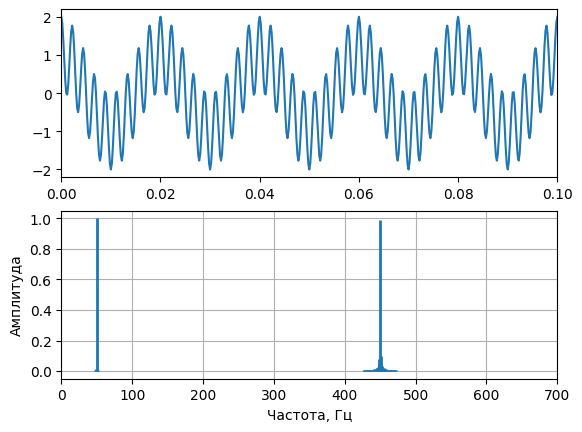

In [5]:
def cos_signal(t, f, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, f - список частот сигнала, A - амплитуда сигнала.
    '''
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

num_cos = 5000  # количество отсчетов
f = [50, 450]

# создание сигнала
t_cos = np.linspace(0, 1, num_cos)
y_cos = cos_signal(t_cos, f)

# дискретный спектр
freq_cos = np.fft.rfftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
yff = np.fft.rfft(y_cos)

fig, axs = plt.subplots(2)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

# график спектра
axs[1].vlines(freq_cos, 0, abs(yff) / num_cos * 2, linewidth=2)
axs[1].grid()
axs[1].set_xlabel('Частота, Гц')
axs[1].set_ylabel('Амплитуда')
axs[1].set_xlim(0, 700)

plt.show()


# 2

# Реализовать алгоритм фильтра Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу из пункта 1, убедиться, что происходит подавление высоких частот сигнала 150 и 450 Гц. Примоделировании ФНЧ воспользоваться формулой (32) из методички “Козулин Цифровая обработка сигналов Python.pdf”. Частоту среза фильтра Баттерворта подберите самостоятельно. В данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц. Построить графики исходного и отфильтрованного сигнала, спектра сигнала и спектр фильтра Баттерворта. Убедитесь, что амплитуда исходного сигнала для частоты 50 Гц будет совпадать с амплитудой отфильтрованного сигнала.

(32) $H(w, w_c) = \dfrac{w_c^2}{−w^2 + j√2w_cw + w_c^2}$

In [6]:
w = np.linspace(0, 700, 10000)

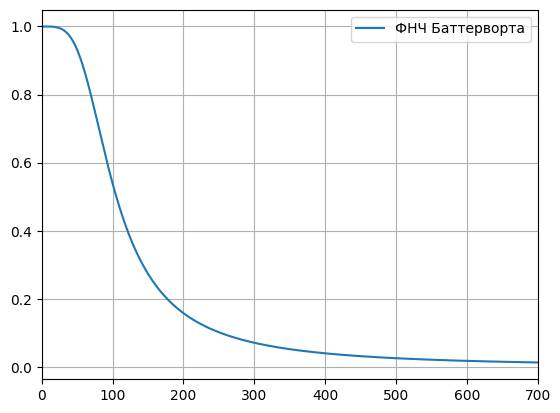

In [7]:
def butter_lpf(w, wc):
    return wc**2 / (-w**2 + 1j * np.sqrt(2) * wc * w + wc**2)

wc = 80 # частота среза

plt.plot(w, abs(butter_lpf(w, wc=wc)), label = "ФНЧ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

In [8]:
y_cos_50 = cos_signal(t_cos, [50])

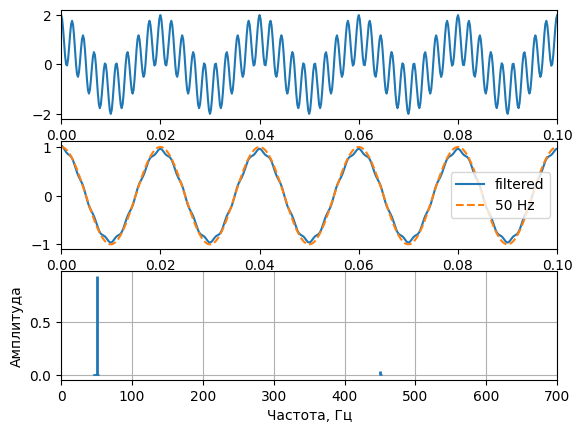

In [9]:
y_fft_b = yff * abs(butter_lpf(freq_cos, wc)) # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b).real
axs[1].plot(t_cos, yB)
axs[1].plot(t_cos, y_cos_50, linestyle='dashed')
axs[1].legend(["filtered", "50 Hz"]) 
axs[1].set_xlim(0, 0.1)


# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

# 4

# Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит подавление низких частот сигнала (50 и 150 Гц), воспользовавшись формулой (35). Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра ФНЧ.

(35) $H(w, w_c) = \dfrac{w^2}{−w_c^2 + j√2w_cw + w^2}$

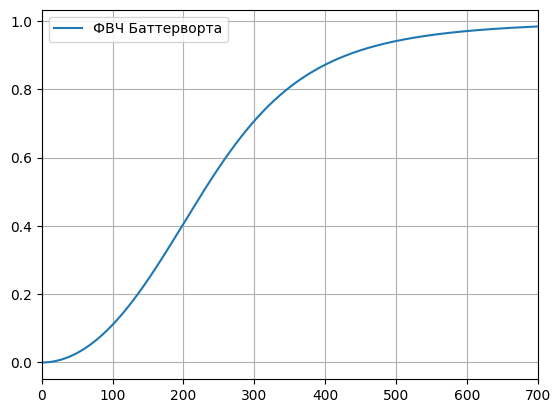

In [10]:
def butter_hpf(w, wc):
    return w**2 / (-wc**2 + 1j * np.sqrt(2) * wc * w + w**2)

wc = 300 # частота среза

plt.plot(w, abs(butter_hpf(w, wc=wc)), label = "ФВЧ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

In [11]:
y_cos_450 = cos_signal(t_cos, [450])

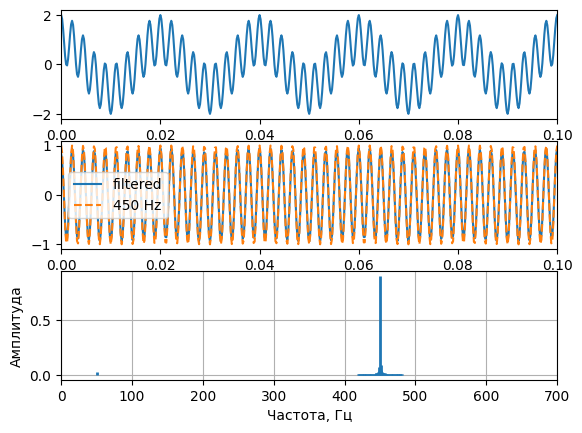

In [12]:
y_fft_b = yff * abs(butter_hpf(freq_cos, wc))

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b)
axs[1].plot(t_cos, yB.real)
axs[1].plot(t_cos, y_cos_450, linestyle='dashed')
axs[1].legend(["filtered", "450 Hz"]) 
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

# 5

# Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту 150Гц. При моделировании использовать формулы (36) и (37). Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров ПФ/ЗФ.

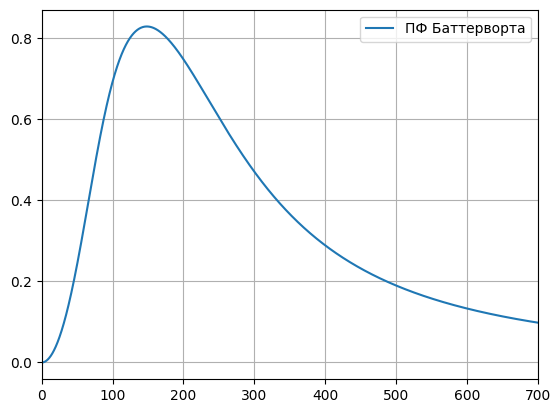

In [13]:
def butter_bpf(w, w1, w2):
    return butter_lpf(w, w2) * butter_hpf(w, w1)

w1 = 100
w2 = 220

plt.plot(w, abs(butter_bpf(w, w1, w2)), label = "ПФ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

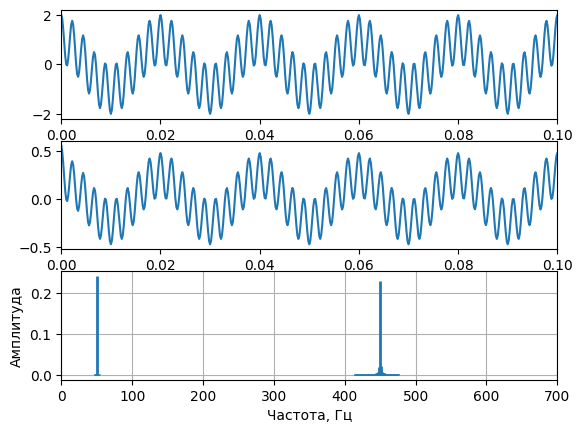

In [14]:
y_fft_b = yff * abs(butter_bpf(freq_cos, w1, w2))

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b)
axs[1].plot(t_cos, yB.real)
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

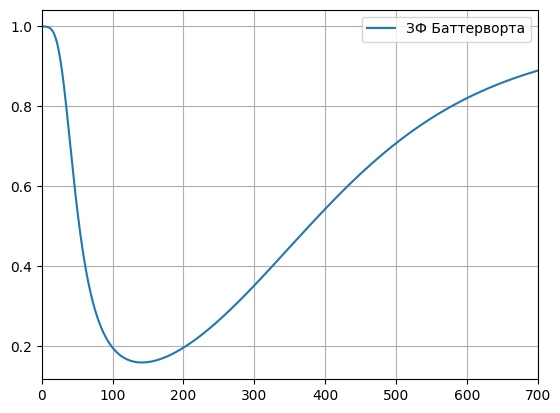

In [15]:
def butter_bsf(w, w1, w2):
    return butter_lpf(w, w1) + butter_hpf(w, w2)

w1 = 40
w2 = 500

plt.plot(w, abs(butter_bsf(w, w1, w2)), label = "ЗФ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

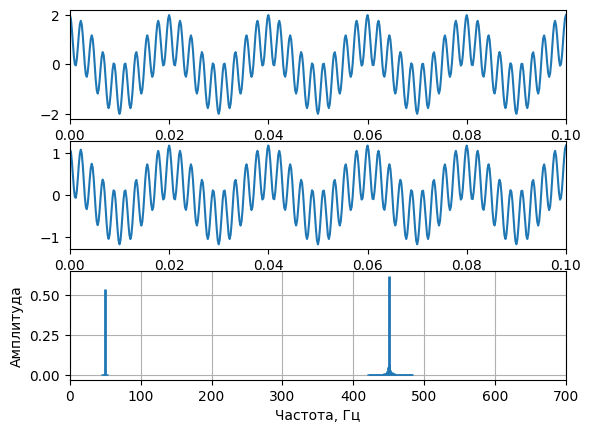

In [16]:
y_fft_b = yff * abs(butter_bsf(freq_cos, w1, w2))

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b)
axs[1].plot(t_cos, yB.real)
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

# 6

Согласно формулам (28, 29) возможно построить  любого порядка.
Постройте фильтр Баттерворта 3-го и 4-го порядка с автоматическим определением полюсов
фильтра. Реализуйте пункт 1 данной лабораторной для Фильтра Баттерворта 4-го порядка.

(28) $H_p(S, n) = \dfrac{1}{1 + (−1)^n(S)^{2n}}$

(29) $H_n(S) = \dfrac 1 {(S − S_1) \cdot (S − S_2) \dots (S − S_n)}$

$S_1 , S_2 , ..., S_n$ – полюсы

S1 = exp (j ∙ 3π/4)

S2 = exp (j ∙ 5π/4)

примеч.: Полюсы передаточной функции обладают симметрией, а именно их число и
конфигурация расположения в обеих полуплоскостях одинаковы. При этом физически
реализуемому фильтру отвечают только полюсы, расположенные в левой полуплоскости.

Полюсы фильтра Баттерворта 2-го порядка: [(-0.7071067811865475+0.7071067811865476j), (-0.7071067811865477-0.7071067811865475j)]
Полюсы фильтра Баттерворта 3-го порядка: [(-0.4999999999999998+0.8660254037844387j), (-1+1.2246467991473532e-16j), (-0.5000000000000004-0.8660254037844384j)]
Полюсы фильтра Баттерворта 4-го порядка: [(-0.3826834323650897+0.9238795325112867j), (-0.9238795325112867+0.3826834323650899j), (-0.9238795325112868-0.38268343236508967j), (-0.38268343236509034-0.9238795325112865j)]
Полюсы фильтра Баттерворта 5-го порядка: [(-0.30901699437494734+0.9510565162951536j), (-0.8090169943749473+0.5877852522924732j), (-1+1.2246467991473532e-16j), (-0.8090169943749476-0.587785252292473j), (-0.30901699437494756-0.9510565162951535j)]


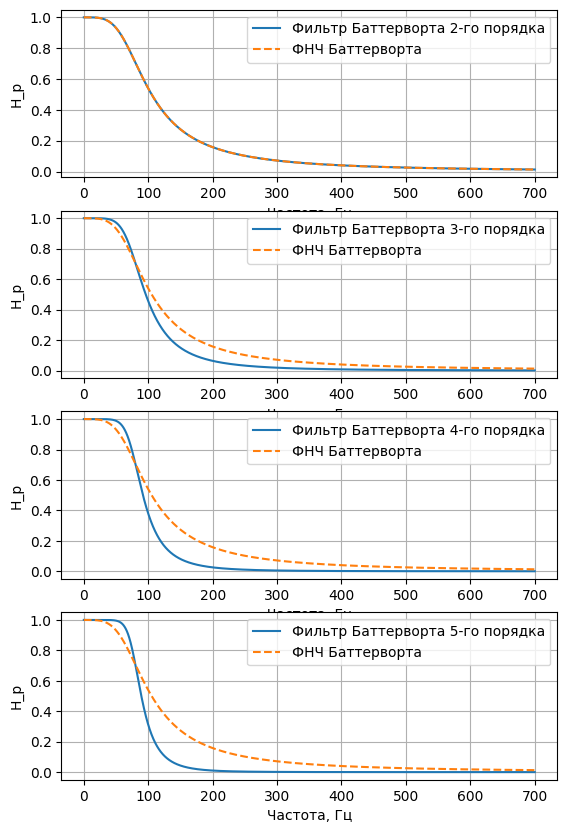

In [17]:
def H_p(w, wc, n): # Фильтр высоких частот порядка n
    s = 1j * w / wc
    poles = []
    for k in range(n):
        pole = np.exp(1j * np.pi * (n + 2 * k + 1) / (2 * n))
        poles.append(pole)

    polynomial = 1
    for pole in poles:
        polynomial *= (s - pole)
    print(f"Полюсы фильтра Баттерворта {n}-го порядка:", poles)
    return 1 / polynomial

wc = 80 # частота среза

ns = [2, 3, 4, 5]
fig, axes = plt.subplots(len(ns))
fig.set_figheight(10)

for i, n in enumerate(ns):
    axes[i].plot(w, abs(H_p(w, wc, n)), label = f"Фильтр Баттерворта {n}-го порядка")
    axes[i].plot(w, abs(butter_lpf(w, wc)), label = "ФНЧ Баттерворта", linestyle='dashed')
    axes[i].set_xlabel("Частота, Гц")
    axes[i].set_ylabel("H_p")
    axes[i].legend()
    axes[i].grid()

plt.show()


Полюсы фильтра Баттерворта 5-го порядка: [(-0.30901699437494734+0.9510565162951536j), (-0.8090169943749473+0.5877852522924732j), (-1+1.2246467991473532e-16j), (-0.8090169943749476-0.587785252292473j), (-0.30901699437494756-0.9510565162951535j)]


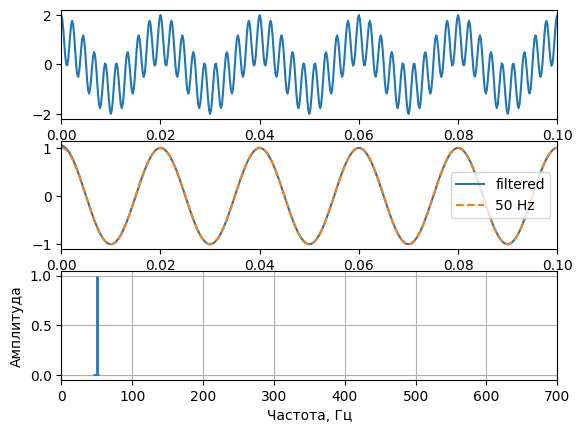

In [18]:
y_fft_b = yff * abs(H_p(freq_cos, wc, n)) # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b).real
axs[1].plot(t_cos, yB)
axs[1].plot(t_cos, y_cos_50, linestyle='dashed')
axs[1].legend(["filtered", "50 Hz"]) 
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

# 9

Попробуйте добавить шум к исходному сигналу, посмотрите как происходит фильтрация
для зашумленного сигнала.

In [19]:
# зашумленный сигнал
def add_noise(signal, noise_level=1):
    '''
    Добавление к сигналу гауссовского шума 
    '''
    return signal + np.random.normal(0, noise_level, signal.shape)

y_cos_noised = add_noise(y_cos, 2)

Полюсы фильтра Баттерворта 5-го порядка: [(-0.30901699437494734+0.9510565162951536j), (-0.8090169943749473+0.5877852522924732j), (-1+1.2246467991473532e-16j), (-0.8090169943749476-0.587785252292473j), (-0.30901699437494756-0.9510565162951535j)]


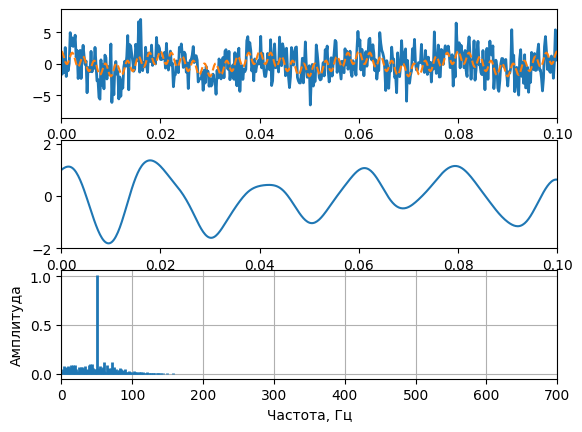

In [20]:
yff_noised = np.fft.rfft(y_cos_noised)
y_fft_b = yff_noised * abs(H_p(freq_cos, wc, n)) # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos_noised, linewidth=2)
axs[0].plot(t_cos, y_cos, linestyle='dashed')
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b).real
axs[1].plot(t_cos, yB)
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

# 10 

Реализуйте фильтр ФНЧ Чебышева 1го рода N порядка.


Фильтр низких частот (ФНЧ) Чебышева первого рода является линейным фильтром, который имеет равно-пульсирующую частотную характеристику в полосе пропускания. Это означает, что в полосе пропускания амплитудно-частотная характеристика фильтра имеет рябь. Чем выше порядок фильтра, тем более крутой спуск за полосой пропускания.

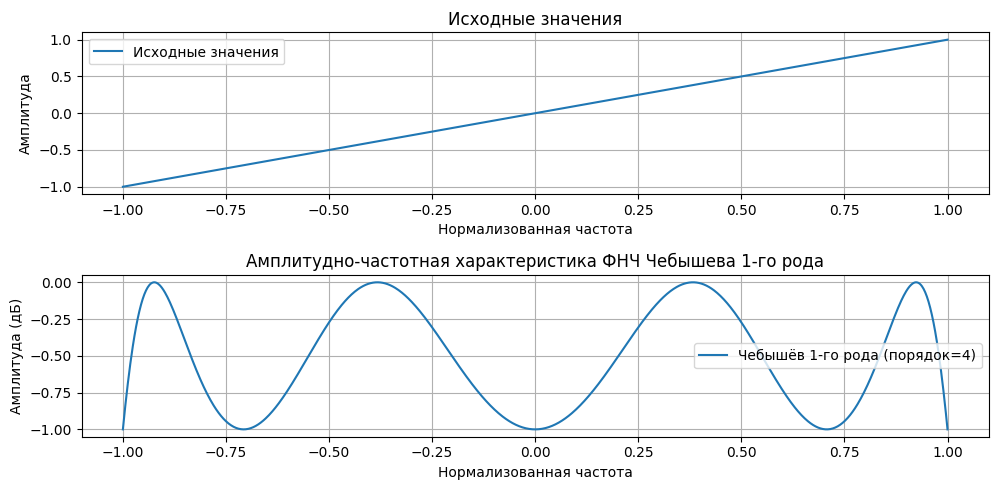

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для расчета полинома Чебышева первого рода
def chebyshev_polynomial(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(n - 1, x) - chebyshev_polynomial(n - 2, x)

# Функция для амплитудной характеристики ФНЧ Чебышева 1-го рода
def chebyshev_filter(order, epsilon, w):
    Tn = chebyshev_polynomial(order, w)
    H = 1 / np.sqrt(1 + epsilon**2 * Tn**2)
    return H

# Параметры фильтра
order = 4  # Порядок фильтра
ripple_db = 1  # Рябь в полосе пропускания в дБ

# Расчет параметра epsilon для амплитудной ряби
epsilon = np.sqrt(10**(ripple_db / 10) - 1)

# Генерация частотной оси
w = np.linspace(-1, 1, 1000)

# Расчет амплитудной характеристики фильтра
H = chebyshev_filter(order, epsilon, w)

# Построение графиков
plt.figure(figsize=(10, 5))

# График исходных значений
plt.subplot(2, 1, 1)
plt.plot(w, w, label='Исходные значения')
plt.title('Исходные значения')
plt.xlabel('Нормализованная частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

# График амплитудной характеристики фильтра
plt.subplot(2, 1, 2)
plt.plot(w, 20 * np.log10(np.abs(H)), label=f"Чебышёв 1-го рода (порядок={order})")
plt.title('Амплитудно-частотная характеристика ФНЧ Чебышева 1-го рода')
plt.xlabel('Нормализованная частота')
plt.ylabel('Амплитуда (дБ)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


/home/vladislave/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


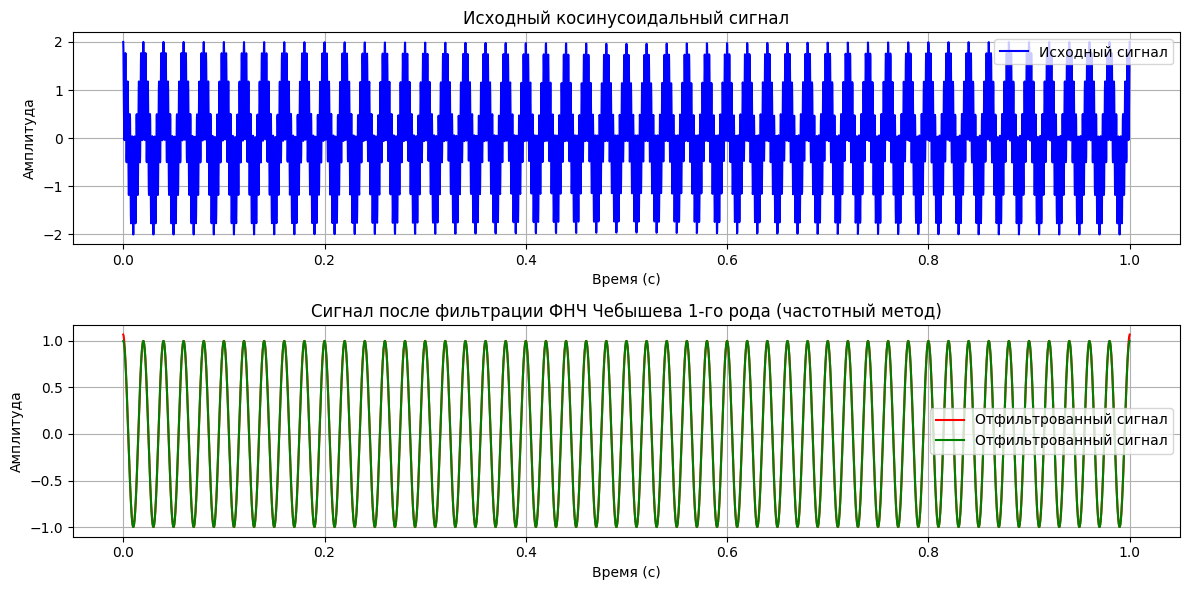

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания косинусоидального сигнала
def cos_signal(t, f, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, f - список частот сигнала, A - амплитуда сигнала.
    '''
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

# Функция для создания ФНЧ фильтра в частотной области
def chebyshev_lp_filter(freqs, cutoff, order, ripple=0.01):
    '''
    Создание амплитудно-частотной характеристики фильтра Чебышева 1-го рода.
    freqs - массив частот.
    cutoff - частота среза.
    order - порядок фильтра.
    ripple - коэффициент ряби.
    '''
    epsilon = np.sqrt(10**(ripple / 10) - 1)
    # Создаем маску для частот, где freqs / cutoff >= 1, чтобы избежать ошибки
    mask = freqs / cutoff >= 1
    filter_response = np.ones_like(freqs)
    # Применяем формулу только к значениям, где маска истинна
    filter_response[mask] = 1 / np.sqrt(1 + (epsilon**2 * np.cosh(order * np.arccosh(freqs[mask] / cutoff))**2))
    # Для частот ниже cutoff фильтр имеет значение 1
    filter_response[~mask] = 1
    return filter_response

# Параметры сигнала
num_cos = 5000  # количество отсчетов
frequencies = [50, 450]  # частоты сигнала
sampling_rate = num_cos  # предположим, что частота дискретизации равна количеству отсчетов

# Создание сигнала
t_cos = np.linspace(0, 1, num_cos)
y_cos = cos_signal(t_cos, frequencies)


freq2 = [50]
y_cos2 = cos_signal(t_cos, freq2)

# Преобразование сигнала в частотную область
Y_cos_fft = np.fft.fft(y_cos)
freqs = np.fft.fftfreq(num_cos, 1 / sampling_rate)

# Создание фильтра в частотной области
cutoff_freq = 100  # частота среза в Гц
order = 5  # порядок фильтра
# Создаем симметричный фильтр для положительных и отрицательных частот
chebyshev_filter = chebyshev_lp_filter(np.abs(freqs), cutoff_freq, order)
chebyshev_filter = np.clip(chebyshev_filter, 0, 1)  # ограничиваем значения между 0 и 1

# Применение фильтра к спектру сигнала
filtered_Y_cos_fft = Y_cos_fft * chebyshev_filter

# Обратное преобразование Фурье для получения отфильтрованного сигнала
filtered_y_cos = np.fft.ifft(filtered_Y_cos_fft).real

# Построение графиков
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t_cos, y_cos, label='Исходный сигнал', color='blue')
plt.title('Исходный косинусоидальный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

# Отфильтрованный сигнал вручную
plt.subplot(2, 1, 2)
plt.plot(t_cos, filtered_y_cos, label='Отфильтрованный сигнал', color='red')
plt.plot(t_cos, y_cos2, label='Отфильтрованный сигнал', color='green')
plt.title('Сигнал после фильтрации ФНЧ Чебышева 1-го рода (частотный метод)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


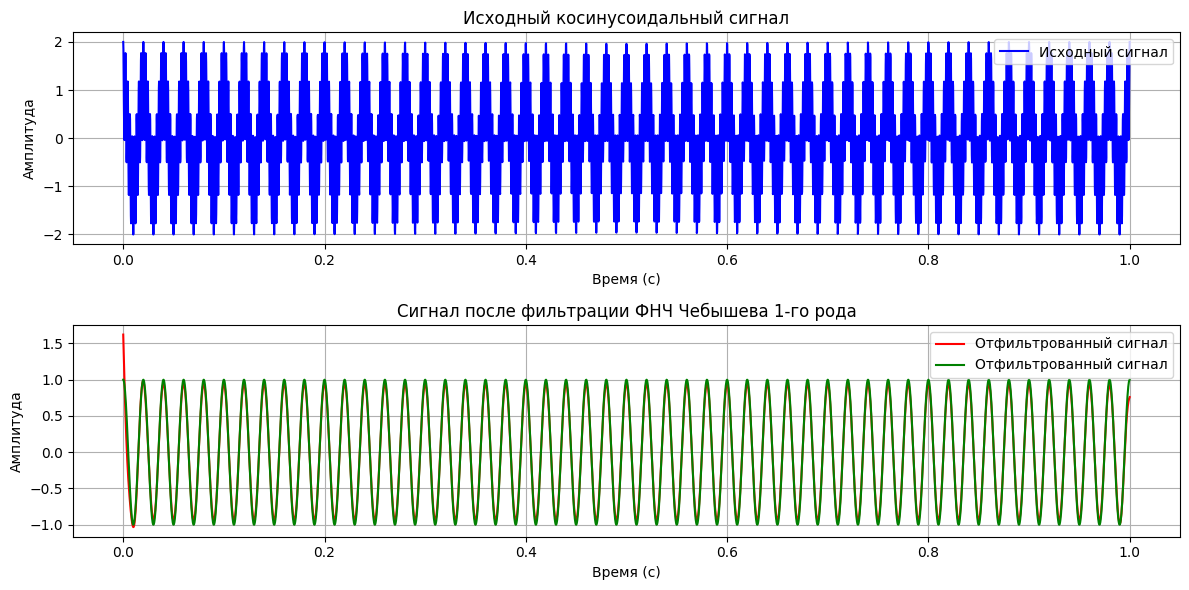

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Функция для создания косинусоидального сигнала
def cos_signal(t, f, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, f - список частот сигнала, A - амплитуда сигнала.
    '''
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

# Параметры сигнала
num_cos = 5000  # количество отсчетов
frequencies = [50, 450]  # частоты сигнала

# Создание сигнала
t_cos = np.linspace(0, 1, num_cos)
y_cos = cos_signal(t_cos, frequencies)

# Настройка параметров фильтра Чебышева 1-го рода
order = 4  # порядок фильтра
cutoff_freq = 100  # частота среза в Гц
sampling_rate = num_cos  # предположим, что частота дискретизации равна количеству отсчетов

# Нормализация частоты среза
nyquist_rate = sampling_rate / 2
normalized_cutoff = cutoff_freq / nyquist_rate

# Создание фильтра Чебышева 1-го рода
b, a = signal.cheby1(order, 1, normalized_cutoff, btype='low')

# Применение фильтра к сигналу
filtered_y_cos = signal.filtfilt(b, a, y_cos)

# Построение графиков
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t_cos, y_cos, label='Исходный сигнал', color='blue')
plt.title('Исходный косинусоидальный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

# Отфильтрованный сигнал
plt.subplot(2, 1, 2)
plt.plot(t_cos, filtered_y_cos, label='Отфильтрованный сигнал', color='red')
plt.plot(t_cos, y_cos2, label='Отфильтрованный сигнал', color='green')

plt.title('Сигнал после фильтрации ФНЧ Чебышева 1-го рода')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
